# Understand the data

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

%matplotlib inline

In [4]:
#load data from lacal
df= pd.read_csv('C:/Users/ooi.weixin/Documents/Learning Material/9.1 Time-series forecasting (Stock closing price)/data/missing_value.csv')
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [5]:
# Convert date to datetime format and set as index
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [8]:
#add a new column of missing for summarizing and charting purpose
df = df.assign(missing= np.nan)
df.missing[df.target.isna()] = df.reference
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
reference    96 non-null float64
target       75 non-null float64
missing      21 non-null float64
dtypes: float64(3)
memory usage: 3.0 KB


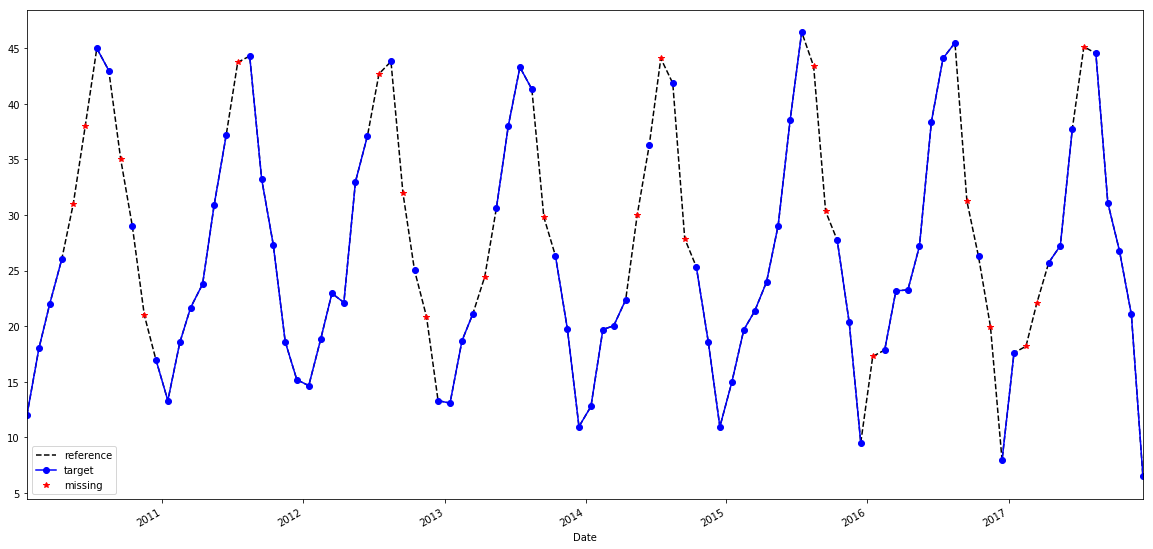

In [10]:
#plot
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

# Missing value imputation

## Mean
Impute the missing data with target mean of the full data

In [11]:
df = df.assign(FillMean=df.target.fillna(df.target.mean()))

## Median
Impute the missing data with target median of the full data

In [13]:
df = df.assign(FillMedian=df.target.fillna(df.target.median()))

## Rolling Average

In [15]:
#average window of 24 data points
#minimum number of observation with value in a window = 1; else = NA
df = df.assign(RollingMean=df.target.fillna(df.target.rolling(24,min_periods=1,).mean()))

## Rolling Median

In [19]:
#average window of 24 data points
#minimum number of observation with value in a window = 1; else = NA
df = df.assign(RollingMedian=df.target.fillna(df.target.rolling(24,min_periods=1,).median()))# imputing using the median

## Imputation using interpolation with different methods

Additional notes:
1. For the time interpolation to succeed, the dataframe must have the index in Date format with intervals of 1 day or more, (daily, monthly, …) however, it will not work for time-based data, like hourly data and so.

2. if it is important to use a different index for the dataframe, the use the reset_index().set_index('Date'), do the interpolation, and then apply the reset_index().set_index('DesiredIndex').

In [20]:
df = df.assign(InterpolateLinear=df.target.interpolate(method='linear'))
df = df.assign(InterpolateTime=df.target.interpolate(method='time'))
df = df.assign(InterpolateQuadratic=df.target.interpolate(method='quadratic'))
df = df.assign(InterpolateCubic=df.target.interpolate(method='cubic'))
df = df.assign(InterpolateSLinear=df.target.interpolate(method='slinear'))
df = df.assign(InterpolateAkima=df.target.interpolate(method='akima'))
df = df.assign(InterpolatePoly5=df.target.interpolate(method='polynomial', order=5)) 
df = df.assign(InterpolatePoly7=df.target.interpolate(method='polynomial', order=7))
df = df.assign(InterpolateSpline3=df.target.interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df.target.interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df.target.interpolate(method='spline', order=5))

# Result comparison (R2) of different methods

In [26]:
results = [(method, r2_score(df.reference, df[method])) for method in list(df)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
9,InterpolateAkima,0.981684100149588
5,InterpolateTime,0.9815664478940275
8,InterpolateSLinear,0.9815664478940275
4,InterpolateLinear,0.9813215759943529
6,InterpolateQuadratic,0.9663474396797
12,InterpolateSpline3,0.9633836918698976
7,InterpolateCubic,0.9633218181089737
10,InterpolatePoly5,0.954157955951024
14,InterpolateSpline5,0.951671359314308
11,InterpolatePoly7,0.9504371542313383


## Plot data after imputation

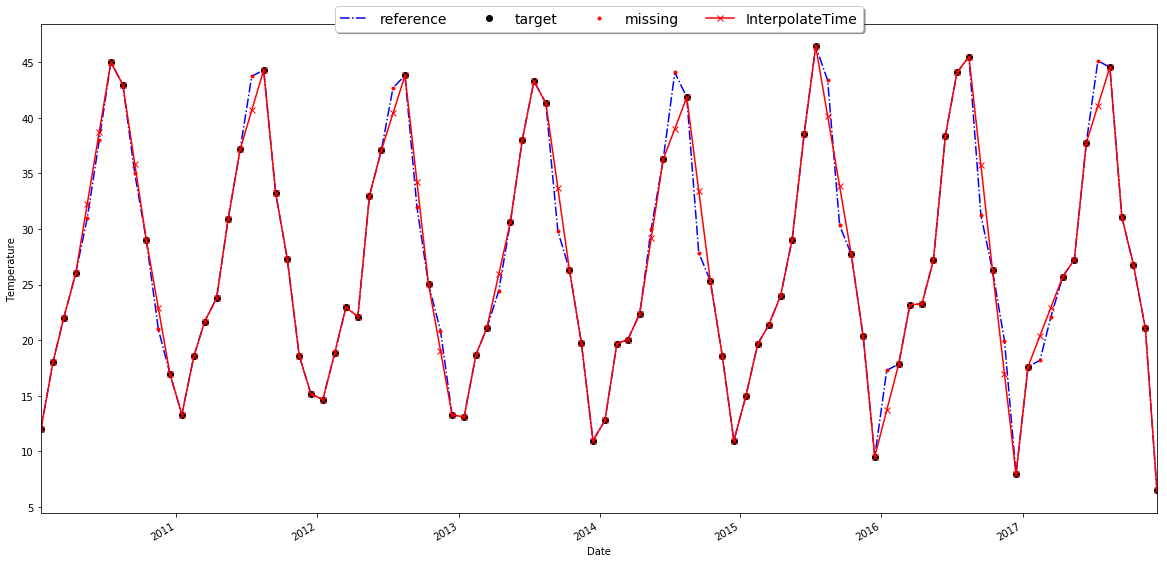

In [27]:
final_df= df[['reference', 'target', 'missing', 'InterpolateTime' ]]
final_df.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10));
plt.ylabel('Temperature');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14} );